## NOTES:
* embedded is code to calculate each star school rank breakdown of absences percentages
* embedded is code to extract school_ward_int and school_cluster_int columns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../../01_data/cleaned_data/school_df_v3.csv')

In [3]:
data.head()

,school_sector,school_code,school_name,school_grade_range,school_enrollment_SY1819,school_star_score_SY1819,school_star_rating_SY1819,school_capacity_SY1819,school_unfilled_seats_SY1819,school_latitude,...,pct_of_absences_20+_SY1819,pct_of_student_absences_20+_SY1819,pct_of_absences_1-5_SY1718,pct_of_absences_6-10_SY1718,pct_of_absences_11-20_SY1718,pct_of_absences_20+_SY1718,pct_of_student_absences_1-5_SY1718,pct_of_student_absences_6-10_SY1718,pct_of_student_absences_11-20_SY1718,pct_of_student_absences_20+_SY1718
0,DCPS,202,Aiton Elementary School,PK3-5th,244.0,10.79,1.0,529.0,285.0,38.897002,...,0.113514,0.086066,0.418079,0.327684,0.186441,0.067797,0.304527,0.238683,0.135802,0.049383
1,DCPS,203,Amidon-Bowen Elementary School,PK3-5th,339.0,48.54,3.0,400.0,61.0,38.879515,...,0.037453,0.029499,0.505085,0.332203,0.122034,0.040678,0.424501,0.279202,0.102564,0.034188
2,DCPS,450,Anacostia High School,9th-12th,296.0,3.68,1.0,837.0,541.0,38.870084,...,0.653846,0.746622,0.079082,0.102041,0.150510,0.668367,0.081794,0.105541,0.155673,0.691293
3,DCPS,452,Ballou High School,9th-12th,650.0,4.83,1.0,NaN,NaN,38.838512,...,0.764012,0.796923,0.057734,0.111111,0.225490,0.605664,0.060227,0.115909,0.235227,0.631818
4,DCPS,462,Ballou STAY,Adult,524.0,NaN,NaN,NaN,NaN,38.838512,...,0.880240,0.280534,0.034965,0.034965,0.034965,0.895105,0.010101,0.010101,0.010101,0.258586


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 53 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   school_sector                             116 non-null    object 
 1   school_code                               116 non-null    int64  
 2   school_name                               116 non-null    object 
 3   school_grade_range                        116 non-null    object 
 4   school_enrollment_SY1819                  116 non-null    float64
 5   school_star_score_SY1819                  109 non-null    float64
 6   school_star_rating_SY1819                 109 non-null    float64
 7   school_capacity_SY1819                    108 non-null    float64
 8   school_unfilled_seats_SY1819              108 non-null    float64
 9   school_latitude                           116 non-null    float64
 10  school_longitude                      

<br>

### Changes in school capacity values
* 0.0 : 99
* 100.0 : 2
* -419.0 : 1
* 730.0 : 1
* -339.0 : 1
* -1105.0 : 1
* -717.0 : 1
* -388.0 : 1
* NaN : 7

In [5]:
np.unique(data['school_capacity_SY1819'] - data['school_capacity_SY1718'])

array([-1105.,  -717.,  -419.,  -388.,  -339.,     0.,   100.,   730.,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan])

In [6]:
(data['school_capacity_SY1819'] - data['school_capacity_SY1718']).value_counts()

 0.0       99
 100.0      2
-1105.0     1
 730.0      1
-388.0      1
-419.0      1
-717.0      1
-339.0      1
dtype: int64

In [7]:
data['school_star_score_SY1718'].describe()

count    108.000000
mean      47.671759
std       24.697080
min        2.850000
25%       27.237500
50%       45.370000
75%       66.692500
max       99.010000
Name: school_star_score_SY1718, dtype: float64

c:\programdata\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\programdata\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


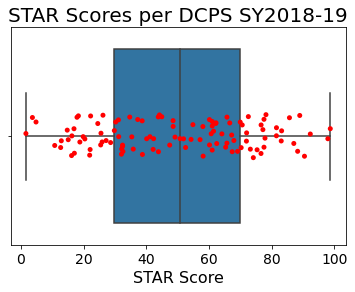

In [8]:
plt.figure(figsize=(6,4))
sns.stripplot(data['school_star_score_SY1819'], color='red')
sns.boxplot(data['school_star_score_SY1819'])
plt.xlabel('STAR Score', fontsize=16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('STAR Scores per DCPS SY2018-19', fontsize=20);
# plt.savefig(f'star_scores_SY1819')

c:\programdata\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\programdata\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


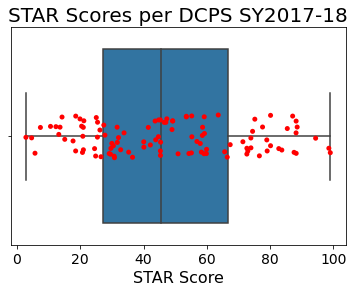

In [9]:
plt.figure(figsize=(6,4))
sns.stripplot(data['school_star_score_SY1718'], color='red')
sns.boxplot(data['school_star_score_SY1718'])
plt.xlabel('STAR Score', fontsize=16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('STAR Scores per DCPS SY2017-18', fontsize=20);
# plt.savefig(f'star_scores_SY1718')

c:\programdata\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


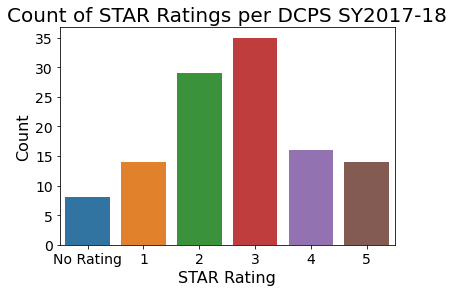

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(data['school_star_rating_SY1718'].fillna(-1))
plt.xlabel('STAR Rating', fontsize=16)
plt.xticks(np.arange(6), labels = ['No Rating', '1', '2', '3', '4', '5'], fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Count', fontsize=16)
plt.title('Count of STAR Ratings per DCPS SY2017-18', fontsize=20);
# plt.savefig(f'count_star_rate_SY1718')

c:\programdata\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


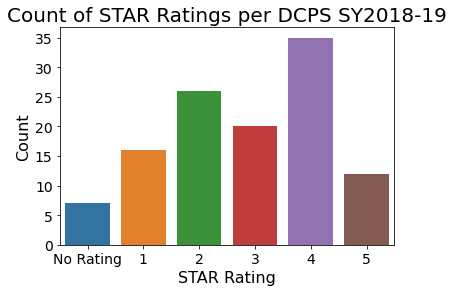

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(data['school_star_rating_SY1819'].fillna(-1))
plt.xlabel('STAR Rating', fontsize=16)
plt.xticks(np.arange(6), labels = ['No Rating', '1', '2', '3', '4', '5'], fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Count', fontsize=16)
plt.title('Count of STAR Ratings per DCPS SY2018-19', fontsize=20);
# plt.savefig(f'count_star_rate_SY1819')

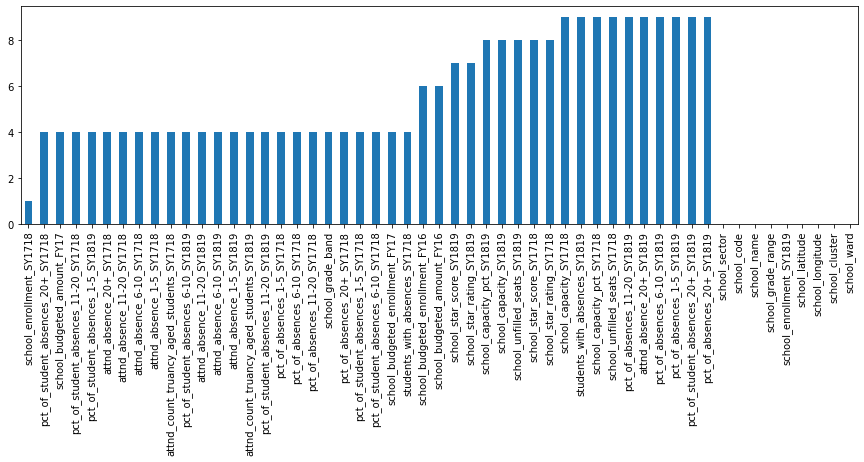

In [12]:
plt.figure(figsize=(15,4))
nulls = data.apply(lambda x: x.isnull().value_counts()).T[True]
nulls.sort_values().plot(kind = 'bar');

In [13]:
data.isna().sum().sort_values()

school_sector                               0
school_cluster                              0
school_longitude                            0
school_latitude                             0
school_ward                                 0
school_grade_range                          0
school_name                                 0
school_code                                 0
school_enrollment_SY1819                    0
school_enrollment_SY1718                    1
attnd_absence_20+_SY1718                    4
school_budgeted_amount_FY17                 4
school_budgeted_enrollment_FY17             4
students_with_absences_SY1718               4
pct_of_student_absences_1-5_SY1819          4
pct_of_student_absences_6-10_SY1819         4
pct_of_student_absences_6-10_SY1718         4
pct_of_absences_1-5_SY1718                  4
pct_of_absences_6-10_SY1718                 4
attnd_absence_11-20_SY1718                  4
pct_of_absences_11-20_SY1718                4
pct_of_absences_20+_SY1718        

In [14]:
data['school_unfilled_seats_SY1819'].value_counts(dropna=False)

0.0      20
NaN       8
42.0      2
62.0      2
54.0      2
         ..
247.0     1
117.0     1
121.0     1
91.0      1
285.0     1
Name: school_unfilled_seats_SY1819, Length: 81, dtype: int64

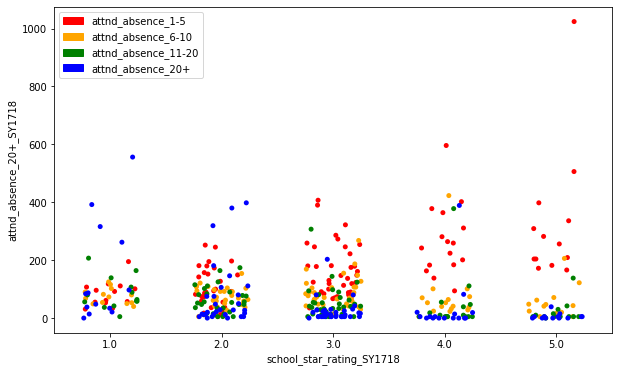

In [15]:
import matplotlib.patches as mpatches
plt.figure(figsize=(10, 6))
sns.stripplot(x= 'school_star_rating_SY1718', y='attnd_absence_1-5_SY1718', data=data, color='red', jitter=.25)
sns.stripplot(x= 'school_star_rating_SY1718', y='attnd_absence_6-10_SY1718', data=data, color='orange', jitter=.25)
sns.stripplot(x= 'school_star_rating_SY1718', y='attnd_absence_11-20_SY1718', data=data, color='green', jitter=.25)
sns.stripplot(x= 'school_star_rating_SY1718', y='attnd_absence_20+_SY1718', data=data, color='blue', jitter=.25)

red_patch = mpatches.Patch(color='red', label='attnd_absence_1-5')
orange_patch = mpatches.Patch(color='orange', label='attnd_absence_6-10')
green_patch = mpatches.Patch(color='green', label='attnd_absence_11-20')
blue_patch = mpatches.Patch(color='blue', label='attnd_absence_20+')
plt.legend(handles=[red_patch,orange_patch,green_patch,blue_patch]);

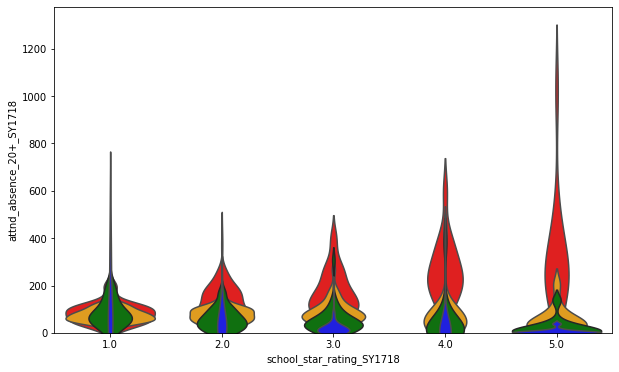

In [16]:
plt.figure(figsize=(10, 6))
sns.violinplot(x= 'school_star_rating_SY1718', y='attnd_absence_1-5_SY1718', data=data, color='red', inner=None)
sns.violinplot(x= 'school_star_rating_SY1718', y='attnd_absence_6-10_SY1718', data=data, color='orange', inner=None)
sns.violinplot(x= 'school_star_rating_SY1718', y='attnd_absence_11-20_SY1718', data=data, color='green', inner=None)
sns.violinplot(x= 'school_star_rating_SY1718', y='attnd_absence_20+_SY1718', data=data, color='blue', inner=None)
plt.ylim(bottom=0);

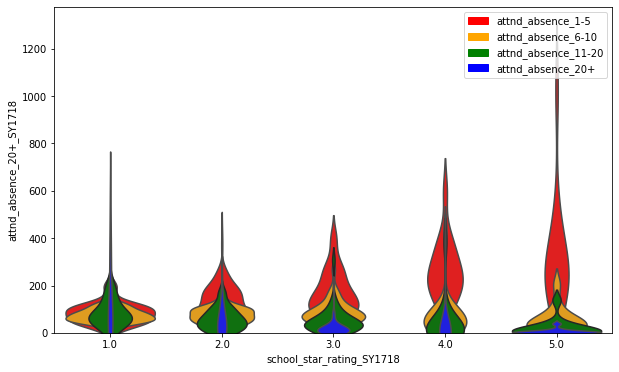

In [17]:
import matplotlib.patches as mpatches

plt.figure(figsize=(10, 6))
sns.violinplot(x= 'school_star_rating_SY1718', y='attnd_absence_1-5_SY1718', data=data, color='red', inner=None)
sns.violinplot(x= 'school_star_rating_SY1718', y='attnd_absence_6-10_SY1718', data=data, color='orange', inner=None)
sns.violinplot(x= 'school_star_rating_SY1718', y='attnd_absence_11-20_SY1718', data=data, color='green', inner=None)
sns.violinplot(x= 'school_star_rating_SY1718', y='attnd_absence_20+_SY1718', data=data, color='blue', inner=None)

red_patch = mpatches.Patch(color='red', label='attnd_absence_1-5')
orange_patch = mpatches.Patch(color='orange', label='attnd_absence_6-10')
green_patch = mpatches.Patch(color='green', label='attnd_absence_11-20')
blue_patch = mpatches.Patch(color='blue', label='attnd_absence_20+')
plt.ylim(bottom=0)
plt.legend(handles=[red_patch,orange_patch,green_patch,blue_patch]);

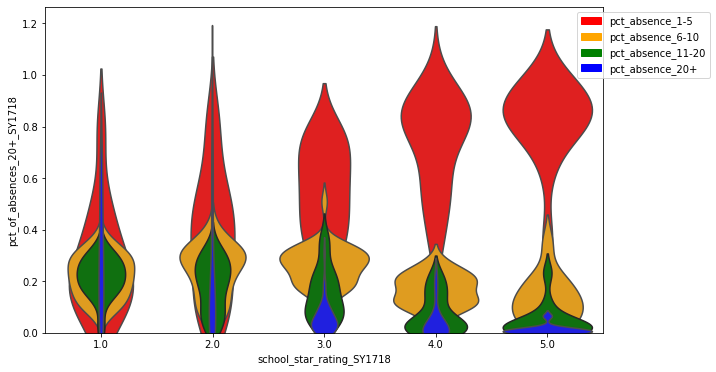

In [18]:
import matplotlib.patches as mpatches

plt.figure(figsize=(10, 6))

g = sns.violinplot(x = 'school_star_rating_SY1718', y='pct_of_absences_1-5_SY1718', data=data, color='red', inner=None)
g = sns.violinplot(x = 'school_star_rating_SY1718', y='pct_of_absences_6-10_SY1718', data=data, color='orange', inner=None)
g = sns.violinplot(x = 'school_star_rating_SY1718', y='pct_of_absences_11-20_SY1718', data=data, color='green', inner=None)
g = sns.violinplot(x = 'school_star_rating_SY1718', y='pct_of_absences_20+_SY1718', data=data, color='blue', inner=None)

red_patch = mpatches.Patch(color='red', label='pct_absence_1-5')
orange_patch = mpatches.Patch(color='orange', label='pct_absence_6-10')
green_patch = mpatches.Patch(color='green', label='pct_absence_11-20')
blue_patch = mpatches.Patch(color='blue', label='pct_absence_20+')

plt.ylim(bottom=0)
plt.legend(handles=[red_patch,orange_patch,green_patch,blue_patch], bbox_to_anchor=(1.2, 1));

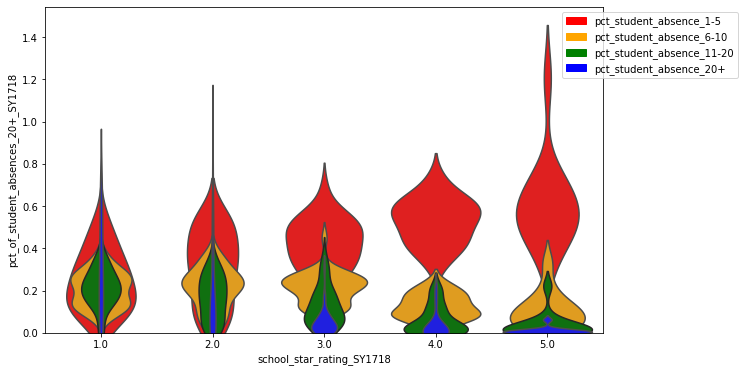

In [19]:
import matplotlib.patches as mpatches

plt.figure(figsize=(10, 6))
sns.violinplot(x= 'school_star_rating_SY1718', y='pct_of_student_absences_1-5_SY1718', data=data, color='red', inner=None)
sns.violinplot(x= 'school_star_rating_SY1718', y='pct_of_student_absences_6-10_SY1718', data=data, color='orange', inner=None)
sns.violinplot(x= 'school_star_rating_SY1718', y='pct_of_student_absences_11-20_SY1718', data=data, color='green', inner=None)
sns.violinplot(x= 'school_star_rating_SY1718', y='pct_of_student_absences_20+_SY1718', data=data, color='blue', inner=None)

red_patch = mpatches.Patch(color='red', label='pct_student_absence_1-5')
orange_patch = mpatches.Patch(color='orange', label='pct_student_absence_6-10')
green_patch = mpatches.Patch(color='green', label='pct_student_absence_11-20')
blue_patch = mpatches.Patch(color='blue', label='pct_student_absence_20+')

plt.ylim(bottom=0)
plt.legend(handles=[red_patch,orange_patch,green_patch,blue_patch], bbox_to_anchor=(1.25, 1));

In [20]:
data['school_capacity_pct_SY1718'].value_counts(dropna=False)

NaN         9
inf         5
0.648000    2
0.937778    2
0.507812    1
           ..
0.907550    1
0.841297    1
0.906977    1
0.452808    1
1.048969    1
Name: school_capacity_pct_SY1718, Length: 102, dtype: int64

In [21]:
#replaces 5 inf with Nan
data=data.replace(np.inf, np.nan)

<AxesSubplot:xlabel='school_code', ylabel='school_capacity_pct_SY1718'>

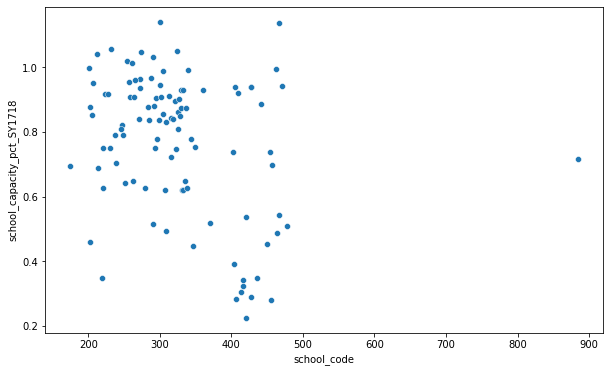

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, y='school_capacity_pct_SY1718', x='school_code')

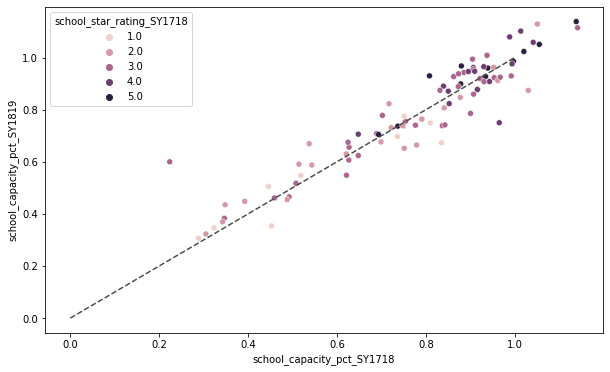

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x = data['school_capacity_pct_SY1718'], y = data['school_capacity_pct_SY1819'], hue=data['school_star_rating_SY1718'])
plt.plot([0, 1], [0, 1], ls="--", c=".3");

In [24]:
i = 1

star_rank_SY1718_df = data[data['school_star_rating_SY1718'] == i]

# count of students in star rank  school
print('count of students in rank ', i, ' school:', star_rank_SY1718_df['school_enrollment_SY1718'].sum())

# count of students in star rank  school with any absences
print('count of students in rank ', i, ' school with any absences:', star_rank_SY1718_df['students_with_absences_SY1718'].sum())

# count of students in star rank  school with no absences
print('count of students in rank ', i, ' school with no absences:', star_rank_SY1718_df['school_enrollment_SY1718'].sum()-star_rank_SY1718_df['students_with_absences_SY1718'].sum())

# percent of star rank  school students with no absences
print('percent of rank ', i, ' school students with no absences:', (star_rank_SY1718_df['school_enrollment_SY1718'].sum()-star_rank_SY1718_df['students_with_absences_SY1718'].sum())/star_rank_SY1718_df['school_enrollment_SY1718'].sum())

# count of students in star rank  school with 1-5 absences
print('count of students in rank ', i, ' school with 1-5 absences:', star_rank_SY1718_df['attnd_absence_1-5_SY1718'].sum())

# percent of star rank  school students with 1-5 absences
print('percent of rank ', i, ' school students with 1-5 absences:', star_rank_SY1718_df['attnd_absence_1-5_SY1718'].sum()/star_rank_SY1718_df['school_enrollment_SY1718'].sum())

# count of students in star rank  school with 6-10 absences
print('count of students in rank ', i, ' school with 6-10 absences:', star_rank_SY1718_df['attnd_absence_6-10_SY1718'].sum())

# percent of star rank  school students with 6-10 absences
print('percent of rank ', i, ' school students with 6-10 absences:', star_rank_SY1718_df['attnd_absence_6-10_SY1718'].sum()/star_rank_SY1718_df['school_enrollment_SY1718'].sum())

# count of students in star rank  school with 11-20 absences
print('count of students in rank ', i, ' school with 11-20 absences:', star_rank_SY1718_df['attnd_absence_11-20_SY1718'].sum())

# percent of star rank  school students with 11-20 absences
print('percent of rank ', i, ' school students with 11-20 absences:', star_rank_SY1718_df['attnd_absence_11-20_SY1718'].sum()/star_rank_SY1718_df['school_enrollment_SY1718'].sum())

# count of students in star rank  school with 20+ absences
print('count of students in rank ', i, ' school with 20+ absences:', star_rank_SY1718_df['attnd_absence_20+_SY1718'].sum())

# percent of star rank  school students with 20+ absences
print('percent of rank ', i, ' school students with 20+ absences:', star_rank_SY1718_df['attnd_absence_20+_SY1718'].sum()/star_rank_SY1718_df['school_enrollment_SY1718'].sum())

count of students in rank  1  school: 5630.0
count of students in rank  1  school with any absences: 5149.0
count of students in rank  1  school with no absences: 481.0
percent of rank  1  school students with no absences: 0.08543516873889875
count of students in rank  1  school with 1-5 absences: 1111.0
percent of rank  1  school students with 1-5 absences: 0.19733570159857905
count of students in rank  1  school with 6-10 absences: 982.0
percent of rank  1  school students with 6-10 absences: 0.1744227353463588
count of students in rank  1  school with 11-20 absences: 1107.0
percent of rank  1  school students with 11-20 absences: 0.1966252220248668
count of students in rank  1  school with 20+ absences: 1949.0
percent of rank  1  school students with 20+ absences: 0.34618117229129663


In [25]:
def func(pct, values): 
    absolute = int(pct / 100.*np.sum(values)) 
    return "{:.1f}%".format(pct, absolute)

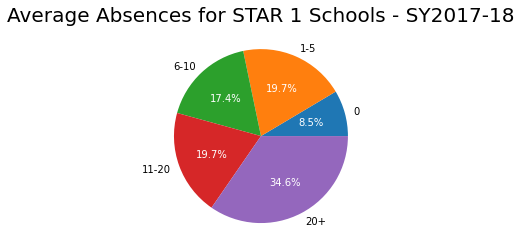

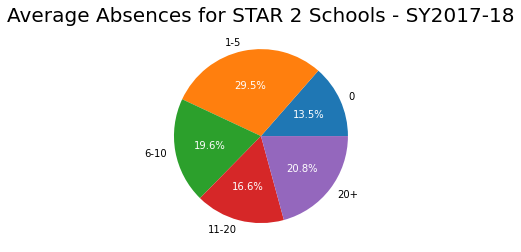

<ipython-input-26-af402c69f836>:15: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, text, autotexts = plt.pie(pcts, labels = pct_labels, autopct = lambda pct: func(pct, pcts));


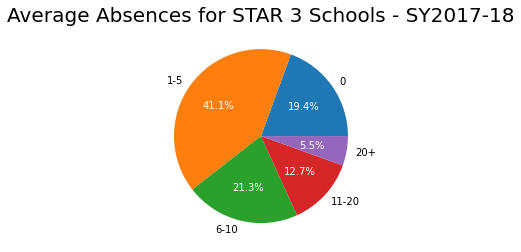

<ipython-input-26-af402c69f836>:15: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, text, autotexts = plt.pie(pcts, labels = pct_labels, autopct = lambda pct: func(pct, pcts));


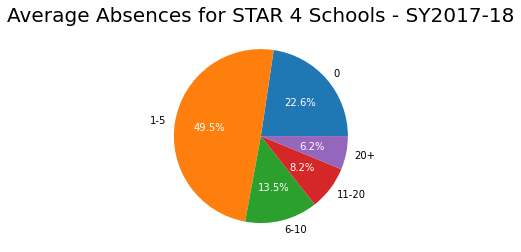

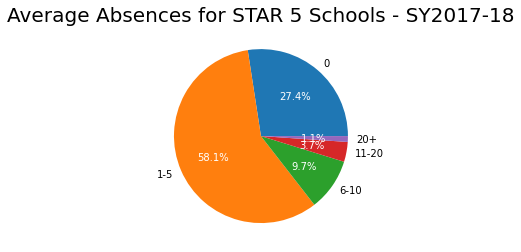

In [26]:
for i in range(1,6):
    star_rank_df = data[data['school_star_rating_SY1718'] == i]

    pct_0 = (star_rank_df['school_enrollment_SY1718'].sum()-star_rank_df['students_with_absences_SY1718'].sum())/star_rank_df['school_enrollment_SY1718'].sum()
    pct_1_5 = star_rank_df['attnd_absence_1-5_SY1718'].sum()/star_rank_df['school_enrollment_SY1718'].sum()
    pct_6_10 = star_rank_df['attnd_absence_6-10_SY1718'].sum()/star_rank_df['school_enrollment_SY1718'].sum()
    pct_11_20 = star_rank_df['attnd_absence_11-20_SY1718'].sum()/star_rank_df['school_enrollment_SY1718'].sum()
    pct_20plus = star_rank_df['attnd_absence_20+_SY1718'].sum()/star_rank_df['school_enrollment_SY1718'].sum()

    pcts = np.array([pct_0,pct_1_5,pct_6_10,pct_11_20,pct_20plus])
    pct_labels = ["0", "1-5", "6-10", "11-20", "20+"]

    plt.title(f'Average Absences for STAR {i} Schools - SY2017-18', fontsize = 20)

    wedges, text, autotexts = plt.pie(pcts, labels = pct_labels, autopct = lambda pct: func(pct, pcts));

    plt.setp(autotexts, size = 10, color='white')
    #plt.savefig(f'star_{i}_SY1718')
    plt.show();

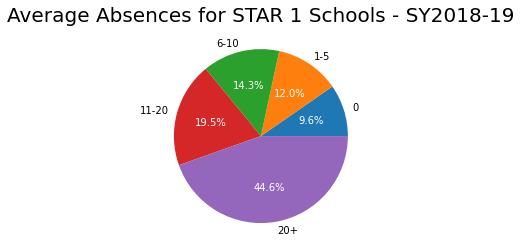

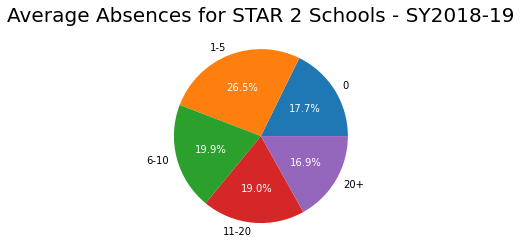

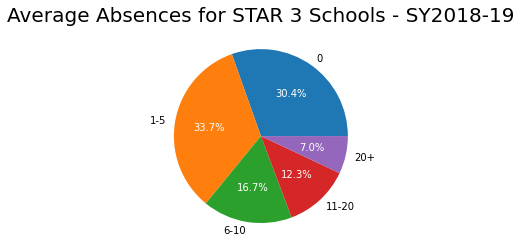

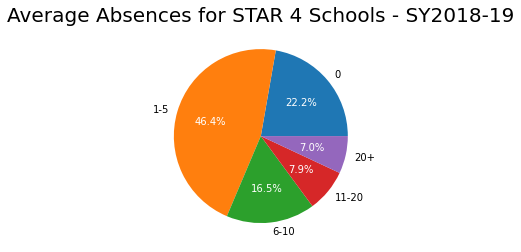

<ipython-input-27-edd2cfe34447>:13: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, text, autotexts = plt.pie(pcts, labels = pct_labels, autopct = lambda pct: func(pct, pcts))


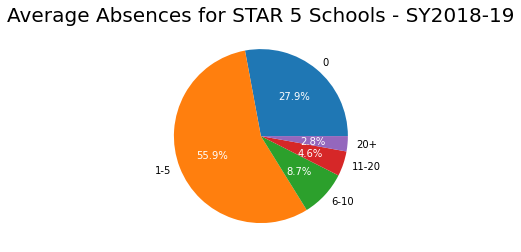

In [27]:
for i in range(1,6):
    star_rank_df = data[data['school_star_rating_SY1819'] == i]

    pct_0 = (star_rank_df['school_enrollment_SY1819'].sum()-star_rank_df['students_with_absences_SY1819'].sum())/star_rank_df['school_enrollment_SY1819'].sum()
    pct_1_5 = star_rank_df['attnd_absence_1-5_SY1819'].sum()/star_rank_df['school_enrollment_SY1819'].sum()
    pct_6_10 = star_rank_df['attnd_absence_6-10_SY1819'].sum()/star_rank_df['school_enrollment_SY1819'].sum()
    pct_11_20 = star_rank_df['attnd_absence_11-20_SY1819'].sum()/star_rank_df['school_enrollment_SY1819'].sum()
    pct_20plus = star_rank_df['attnd_absence_20+_SY1819'].sum()/star_rank_df['school_enrollment_SY1819'].sum()

    pcts = np.array([pct_0,pct_1_5,pct_6_10,pct_11_20,pct_20plus])
    pct_labels = ["0", "1-5", "6-10", "11-20", "20+"]

    wedges, text, autotexts = plt.pie(pcts, labels = pct_labels, autopct = lambda pct: func(pct, pcts))

    plt.setp(autotexts, size = 10, color='white')
    plt.title(f'Average Absences for STAR {i} Schools - SY2018-19', fontsize = 20)
#     plt.savefig(f'star_{i}_SY1819')
    plt.show()

c:\programdata\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\programdata\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


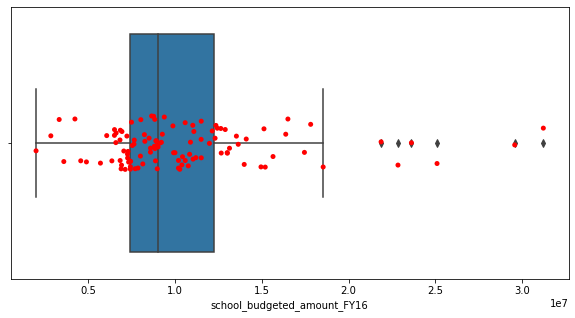

In [28]:
plt.figure(figsize=(10, 5))
sns.stripplot(data['school_budgeted_amount_FY16'], color='red')
sns.boxplot(data['school_budgeted_amount_FY16']);

c:\programdata\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\programdata\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


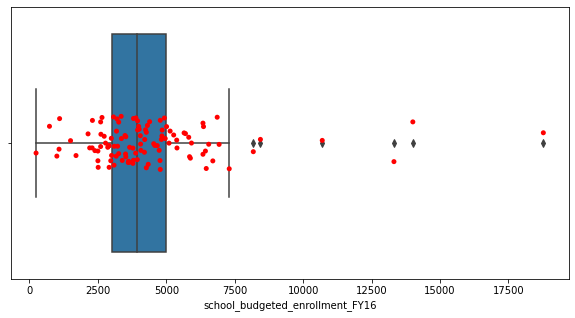

In [29]:
plt.figure(figsize=(10, 5))
sns.stripplot(data['school_budgeted_enrollment_FY16'], color='red')
sns.boxplot(data['school_budgeted_enrollment_FY16']);

c:\programdata\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\programdata\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


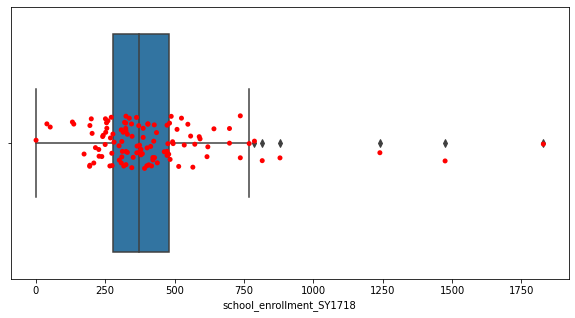

In [30]:
plt.figure(figsize=(10, 5))
sns.stripplot(data['school_enrollment_SY1718'], color='red')
sns.boxplot(data['school_enrollment_SY1718']);

<AxesSubplot:xlabel='school_capacity_pct_SY1718', ylabel='school_budgeted_amount_FY16'>

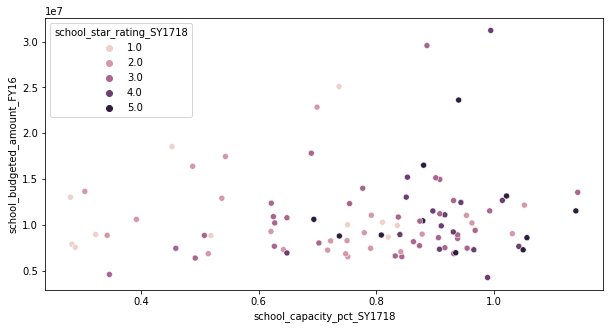

In [31]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x = data['school_capacity_pct_SY1718'], y = data['school_budgeted_amount_FY16'], hue=data['school_star_rating_SY1718'])
#plt.plot([0, 1800], [0, 18000], ls="--", c=".3");

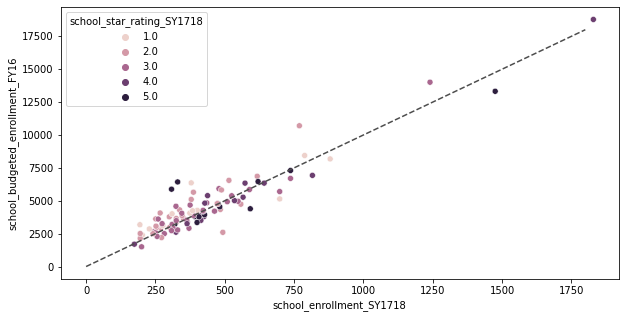

In [32]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x = data['school_enrollment_SY1718'], y = data['school_budgeted_enrollment_FY16'], hue=data['school_star_rating_SY1718'])
plt.plot([0, 1800], [0, 18000], ls="--", c=".3");

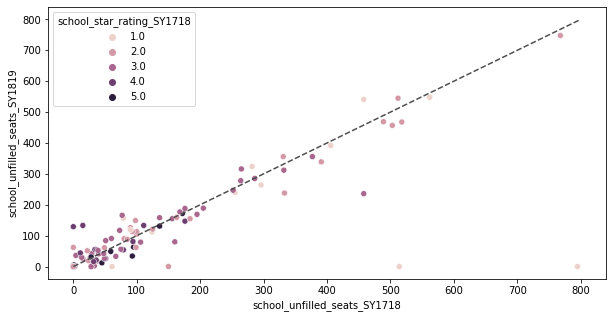

In [33]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data['school_unfilled_seats_SY1718'], y= data['school_unfilled_seats_SY1819'], hue=data['school_star_rating_SY1718'])
plt.plot([0, 800], [0, 800], ls="--", c=".3");

c:\programdata\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\programdata\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


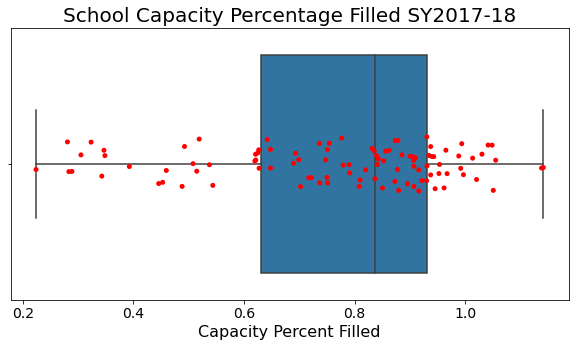

In [34]:
plt.figure(figsize=(10, 5))
sns.stripplot(data['school_capacity_pct_SY1718'], color='red')
sns.boxplot(data['school_capacity_pct_SY1718'])
plt.xlabel('Capacity Percent Filled', fontsize=16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('School Capacity Percentage Filled SY2017-18', fontsize=20);
# plt.savefig(f'capacity_pct_filled_SY1718')

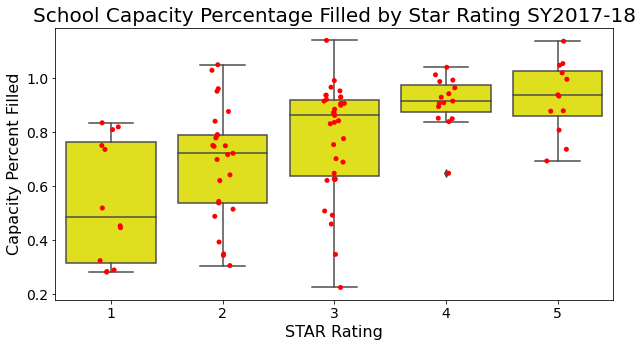

In [35]:
# plt.figure(figsize=(15,8))
# plt.title('School Capacity Percentage Filled by Star Rating SY1718', fontsize = 24)
# sns.boxplot(x= 'school_star_rating_SY1718', y='school_capacity_pct_SY1718', data=data, color='yellow')
# sns.stripplot(x= 'school_star_rating_SY1718', y='school_capacity_pct_SY1718', data=data, color='red');

plt.figure(figsize=(10, 5))
sns.stripplot(x= 'school_star_rating_SY1718', y='school_capacity_pct_SY1718', data=data, color='red');
sns.boxplot(x= 'school_star_rating_SY1718', y='school_capacity_pct_SY1718', data=data, color='yellow')
plt.xlabel('STAR Rating', fontsize=16)
plt.ylabel('Capacity Percent Filled', fontsize=16)
plt.xticks(np.arange(5), labels = ['1', '2', '3', '4', '5'], fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('School Capacity Percentage Filled by Star Rating SY2017-18', fontsize=20);
# plt.savefig(f'capacity_pct_filled_star_SY1718')

c:\programdata\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\programdata\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


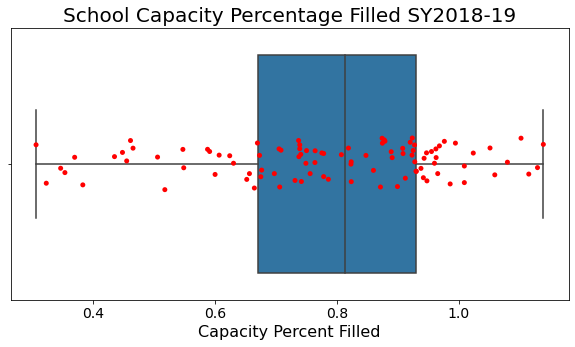

In [36]:
plt.figure(figsize=(10, 5))
sns.stripplot(data['school_capacity_pct_SY1819'], color='red')
sns.boxplot(data['school_capacity_pct_SY1819'])
plt.xlabel('Capacity Percent Filled', fontsize=16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('School Capacity Percentage Filled SY2018-19', fontsize=20);
# plt.savefig(f'capacity_pct_filled_SY1819')

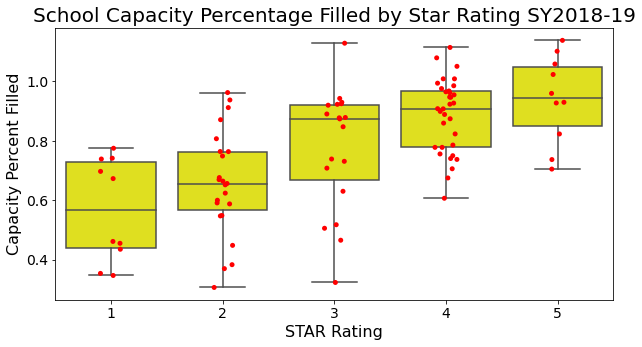

In [37]:
# plt.figure(figsize=(15,8))
# plt.title('School Capacity Percentage Filled by Star Rating SY1819', fontsize = 24)
# sns.boxplot(x= 'school_star_rating_SY1819', y='school_capacity_pct_SY1819', data=data, color='yellow')
# sns.stripplot(x= 'school_star_rating_SY1819', y='school_capacity_pct_SY1819', data=data, color='red');

plt.figure(figsize=(10, 5))
sns.stripplot(x= 'school_star_rating_SY1819', y='school_capacity_pct_SY1819', data=data, color='red');
sns.boxplot(x= 'school_star_rating_SY1819', y='school_capacity_pct_SY1819', data=data, color='yellow')
plt.xlabel('STAR Rating', fontsize=16)
plt.ylabel('Capacity Percent Filled', fontsize=16)
plt.xticks(np.arange(5), labels = ['1', '2', '3', '4', '5'], fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('School Capacity Percentage Filled by Star Rating SY2018-19', fontsize=20);
# plt.savefig(f'capacity_pct_filled_star_SY1819')

In [38]:
data['school_cluster'].describe()

count            116
unique            36
top       Cluster 25
freq              10
Name: school_cluster, dtype: object

In [39]:
data['school_ward'].describe()

count        116
unique         8
top       Ward 8
freq          20
Name: school_ward, dtype: object

c:\programdata\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='school_cluster', ylabel='count'>

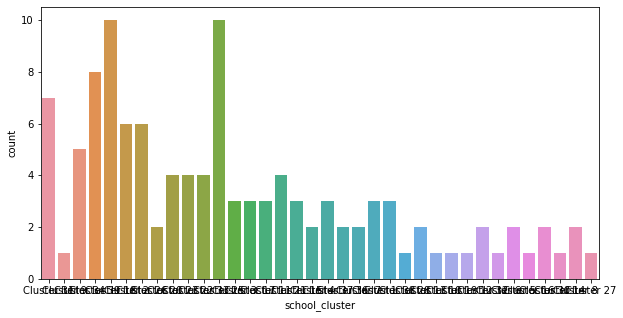

In [40]:
plt.figure(figsize=(10, 5))
sns.countplot(data['school_cluster'])

In [41]:
data['school_cluster'].value_counts()

Cluster 25    10
Cluster 18    10
Cluster 39     8
Cluster 31     7
Cluster 2      6
Cluster 26     6
Cluster 34     5
Cluster 22     4
Cluster 33     4
Cluster 21     4
Cluster 23     4
Cluster 1      3
Cluster 37     3
Cluster 3      3
Cluster 11     3
Cluster 17     3
Cluster 38     3
Cluster 15     3
Cluster 32     2
Cluster 8      2
Cluster 4      2
Cluster 36     2
Cluster 20     2
Cluster 5      2
Cluster 30     2
Cluster 13     2
Cluster 7      2
Cluster 12     1
Cluster 14     1
Cluster 16     1
Cluster 10     1
Cluster 27     1
Cluster 6      1
Cluster 19     1
Cluster 9      1
Cluster 28     1
Name: school_cluster, dtype: int64

In [42]:
# dataframe excluding SY1718 and FY16, so only looking at SY1819
df_1819 = data.drop(columns = data.filter(regex='SY1718$',axis=1)).drop(columns = data.filter(regex='FY16$',axis=1))
df_1819.head(2)

,school_sector,school_code,school_name,school_grade_range,school_enrollment_SY1819,school_star_score_SY1819,school_star_rating_SY1819,school_capacity_SY1819,school_unfilled_seats_SY1819,school_latitude,...,school_capacity_pct_SY1819,students_with_absences_SY1819,pct_of_absences_1-5_SY1819,pct_of_student_absences_1-5_SY1819,pct_of_absences_6-10_SY1819,pct_of_student_absences_6-10_SY1819,pct_of_absences_11-20_SY1819,pct_of_student_absences_11-20_SY1819,pct_of_absences_20+_SY1819,pct_of_student_absences_20+_SY1819
0,DCPS,202,Aiton Elementary School,PK3-5th,244.0,10.79,1.0,529.0,285.0,38.897002,...,0.461248,185.0,0.313514,0.237705,0.329730,0.250000,0.243243,0.184426,0.113514,0.086066
1,DCPS,203,Amidon-Bowen Elementary School,PK3-5th,339.0,48.54,3.0,400.0,61.0,38.879515,...,0.847500,267.0,0.494382,0.389381,0.325843,0.256637,0.142322,0.112094,0.037453,0.029499


In [43]:
# sns.pairplot(df_1819, hue='school_star_rating_SY1819', corner=True);
# plt.savefig(f'pairplots_SY1819')

In [44]:
# dataframe excluding SY1819 and FY17, so only looking at SY1718
df_1718 = data.drop(columns = data.filter(regex='SY1819$',axis=1)).drop(columns = data.filter(regex='FY17$',axis=1))

In [45]:
# sns.pairplot(df_1718, hue='school_star_rating_SY1718', corner=True);
# plt.savefig(f'pairplots_SY1718')

In [46]:
import re as re

def extract_number(text):
    num = re.findall(r'[0-9]+',text)
    return " ".join(num)

data['school_ward_int'] = data['school_ward'].apply(lambda x: extract_number(x))
data['school_cluster_int'] = data['school_cluster'].apply(lambda x: extract_number(x))

In [47]:
data.head(2)

,school_sector,school_code,school_name,school_grade_range,school_enrollment_SY1819,school_star_score_SY1819,school_star_rating_SY1819,school_capacity_SY1819,school_unfilled_seats_SY1819,school_latitude,...,pct_of_absences_1-5_SY1718,pct_of_absences_6-10_SY1718,pct_of_absences_11-20_SY1718,pct_of_absences_20+_SY1718,pct_of_student_absences_1-5_SY1718,pct_of_student_absences_6-10_SY1718,pct_of_student_absences_11-20_SY1718,pct_of_student_absences_20+_SY1718,school_ward_int,school_cluster_int
0,DCPS,202,Aiton Elementary School,PK3-5th,244.0,10.79,1.0,529.0,285.0,38.897002,...,0.418079,0.327684,0.186441,0.067797,0.304527,0.238683,0.135802,0.049383,7,31
1,DCPS,203,Amidon-Bowen Elementary School,PK3-5th,339.0,48.54,3.0,400.0,61.0,38.879515,...,0.505085,0.332203,0.122034,0.040678,0.424501,0.279202,0.102564,0.034188,6,9


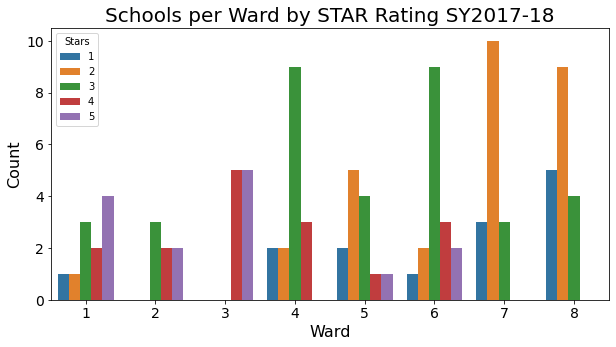

In [48]:
plt.figure(figsize=(10, 5))
sns.countplot(x=data['school_ward_int'].sort_values(), hue=data['school_star_rating_SY1718'])
plt.title('Schools per Ward by STAR Rating SY2017-18', fontsize= 20);
plt.xlabel('Ward', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc='upper left', title='Stars', labels=np.arange(1,6));

# plt.savefig(f'schools_per_ward_stars_SY1718')

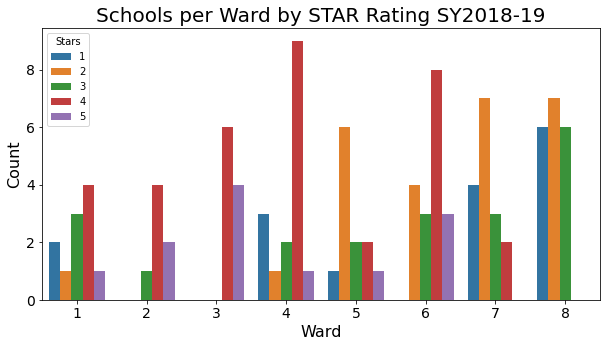

In [49]:
plt.figure(figsize=(10, 5))
sns.countplot(x=data['school_ward_int'].sort_values(), hue=data['school_star_rating_SY1819'])
plt.title('Schools per Ward by STAR Rating SY2018-19', fontsize= 20);
plt.xlabel('Ward', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc='upper left', title='Stars', labels=np.arange(1,6));

# plt.savefig(f'schools_per_ward_stars_SY1819')

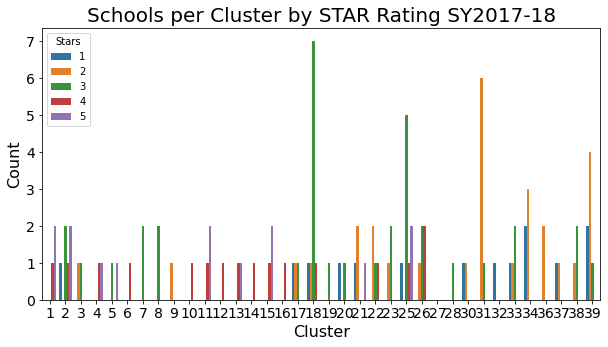

In [50]:
plt.figure(figsize=(10, 5))
sns.countplot(x=data['school_cluster_int'].astype(int).sort_values(), hue=data['school_star_rating_SY1718'])
plt.title('Schools per Cluster by STAR Rating SY2017-18', fontsize= 20);
plt.xlabel('Cluster', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc='upper left', title='Stars', labels=np.arange(1,6));

# plt.savefig(f'schools_per_cluster_stars_SY1718')

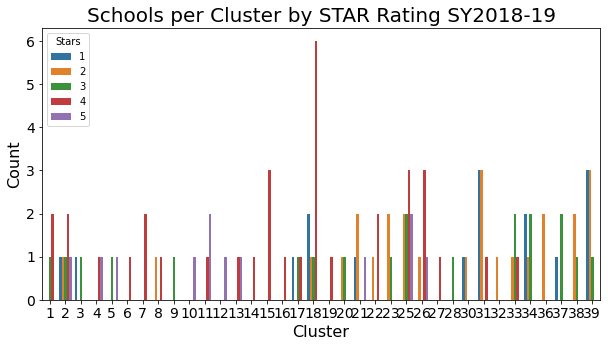

In [51]:
plt.figure(figsize=(10, 5))
sns.countplot(x=data['school_cluster_int'].astype(int).sort_values(), hue=data['school_star_rating_SY1819'])
plt.title('Schools per Cluster by STAR Rating SY2018-19', fontsize= 20);
plt.xlabel('Cluster', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc='upper left', title='Stars', labels=np.arange(1,6));

# plt.savefig(f'schools_per_cluster_stars_SY1819')

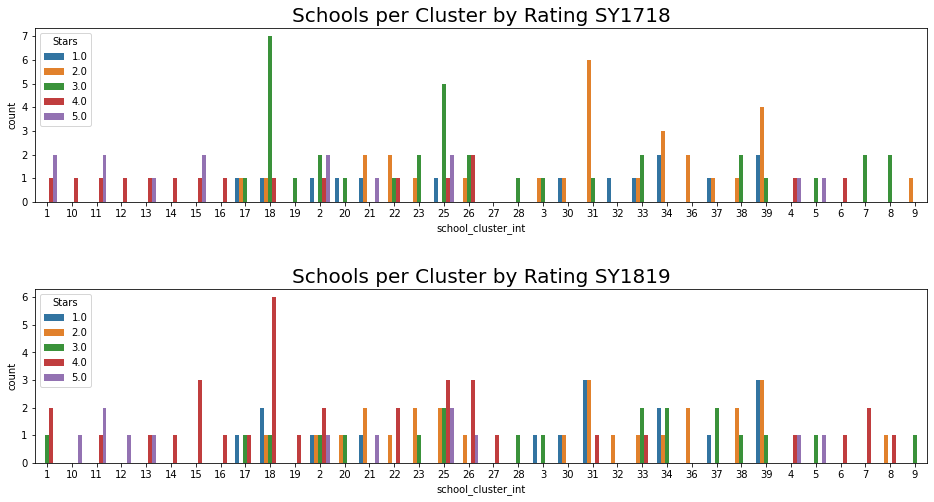

In [52]:
fig, ax = plt.subplots(2,1, figsize=(16, 8))
plt.subplots_adjust(hspace = 0.5)
sns.countplot(x=data['school_cluster_int'].sort_values(), hue=data['school_star_rating_SY1718'], ax = ax[0])
sns.countplot(x=data['school_cluster_int'].sort_values(), hue=data['school_star_rating_SY1819'], ax = ax[1])
ax[0].set_title('Schools per Cluster by Rating SY1718', fontsize= 20);
ax[1].set_title('Schools per Cluster by Rating SY1819', fontsize= 20);

ax[0].legend(loc='upper left', title='Stars');
ax[1].legend(loc='upper left', title='Stars');

# plt.savefig(f'schools_per_cluster_by_stars')